### Install Modules

### Importing Required Libraries

In [1]:
import nltk  # for text manipulation
import re    # for regular expressions   
import string #for string manipulations
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [2]:
train = pd.read_csv(r'C:\Users\DR SAGWE\Documents\Machine-Learning-Projects\HateSpeech.csv')
train.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,1,1,2,2,kindly say bickering to kikuyus and kalenjins. the rest of the country with him.
1,3,1,1,2,2,kindly remind them that we do not have thoroughbred kikuyus but rather a mix of
2,3,1,1,2,2,kindly look at moses' statement. where has he said i will kill u. hmmmm.....guys stop putting words which weren't spoken.saying nitamzima mimi doesn't mean hr is gona kill him. bt deal with him un...
3,3,1,1,2,2,kindly like this page>>>wtf fun facts maasai are the only tribe in kenya mentioned in the bible...4 exclusive...
4,3,1,1,2,2,kindly kikuyus humble yourselves in 2022 and take this man back to sigoi where he belongs.


In [3]:
train[train['hate_speech']==0].head(10)

,count,hate_speech,offensive_language,neither,class,tweet
953,3,0,0,2,2,where are the patriots men and women of goodwill sons and daughters of kenya? #railathetribalchief #uhuruprinceoflooting #kenyansarewathogs
984,3,0,1,2,2,when moses kuria & ngunjiri speak thats hate speech #stopuhuruswardogs n 4 alandwa muthama & #thestupidraila its a constitutional right
1275,3,0,1,2,2,when it is something touching uk he rushes 2 the press breathing fire & gvng threats bt when a citizen is murdered he is nowhere #ripmsando
1804,3,0,1,2,2,to y'all yapping in here. these two guys dance same tune. speak same language. just go on with your hate. #norailanopeace pic.twitter.com/xoy5wrwuby
1837,3,0,1,2,2,those who celebrated @railaodinga declaration of kibaki tosha are now calling him an old mzee who should retire they forget he sacrificed his presidential ambition to a man confined to a wheelchai...
1858,3,0,1,2,2,this is our deputy president in his hey days he was a hustling village preacher. #babuwoes #wembeniuleule #arrestsonko #jichanue
1859,4,0,0,0,2,this is exactly what should be trending instead of #hate #bullying #attacks on innocent people #betrayals #hatespeech #theories #untruth & the major one #disrespect to your own fellow peers.. we a...
1860,3,0,1,2,2,let&amp;#39;s begin from home; let&amp;#39;s stop telling our kids that kikuyus are thieves luos are idiots kalenjin are killers.. https:// twitter.com/honfranklinbet t/status/696292458594963456 ?
1862,3,0,0,3,2,the political elite are in desperation. ordinary kalenjins are suspicious of kikuyu community https:// twitter.com/thestarkenya/s tatus/677715528484524032 ?
1864,3,0,0,3,2,am just curious the only people who are calling him old and mad are kikuyus and not kalenjins and that's a good sign @ktnkenya @sophiawanuna


In [4]:
train[train['hate_speech']==1].head(10)

,count,hate_speech,offensive_language,neither,class,tweet
0,3,1,1,2,2,kindly say bickering to kikuyus and kalenjins. the rest of the country with him.
1,3,1,1,2,2,kindly remind them that we do not have thoroughbred kikuyus but rather a mix of
2,3,1,1,2,2,kindly look at moses' statement. where has he said i will kill u. hmmmm.....guys stop putting words which weren't spoken.saying nitamzima mimi doesn't mean hr is gona kill him. bt deal with him un...
3,3,1,1,2,2,kindly like this page>>>wtf fun facts maasai are the only tribe in kenya mentioned in the bible...4 exclusive...
4,3,1,1,2,2,kindly kikuyus humble yourselves in 2022 and take this man back to sigoi where he belongs.
5,3,1,1,2,2,kill the ignorant with facts. it's very difficult to understand why the elder odinga is always mocked by majority of kikuyus yet he's always been on their side
6,3,1,1,2,2,kill business politicians kill people kill anything but you will never kill bright minds... luhya nation is standing firm.
7,3,1,1,2,2,kill all the elephants? uneasy truce between maasai and nature - cnn.com
8,3,1,1,2,2,kilifi lamu kwale and mombasa. .âcoastâ is a term used by kikuyus haters to creat fear of economic isolation of the kikuyu people.
9,3,1,1,2,2,kikuyus you are peaceful people i agree but you have costed us alot.... kibaki did the same thing uhuru is doing u know where it landed us


In [5]:
train.shape

(50175, 6)

In [6]:
train['class'].value_counts()

2    37677
1     9256
0     3242
Name: class, dtype: int64

### Distribution of length of the tweets, in terms of words, in the train data.

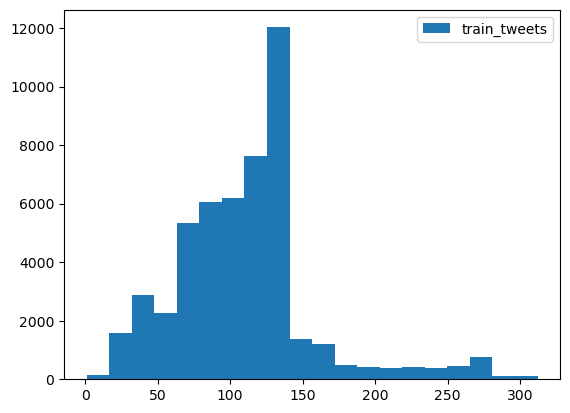

In [7]:
train_length = train['tweet'].str.len()
plt.hist(train_length,bins=20,label="train_tweets")
plt.legend()
plt.show()

In [8]:
combi = train.append(train,ignore_index=True,sort=False)
combi.shape

C:\Users\DR SAGWE\AppData\Local\Temp\ipykernel_12924\3124039262.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combi = train.append(train,ignore_index=True,sort=False)


(100350, 6)

### Remove unwanted text patterns from the tweets.

In [9]:
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern,input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

### Removing Twitter Handles (@user)
We create a new column tidy_tweet, it will contain the cleaned and processed tweets. Note that we have passed “@[]*” as 
the pattern to the remove_pattern function. It is actually a regular expression which will pick any word starting with ‘@’.

We will remove the twitter handles as they are already masked as @user due to privacy concerns. We will also get rid of the 
punctuations, numbers and even special characters since they wouldn’t help in differentiating different types of tweets. 
Most of the smaller words do not add much value. For example, ‘pdx’, ‘his’, ‘all’. So, we will try to remove them as well 
from our data. Lastly, we will normalize the text data. For example, reducing terms like loves, loving, and lovable to their
base word, i.e., ‘love’.are often used in the same context. If we can reduce them to their root word, which is ‘love’. It will
help in reducing the total number of unique words in our data without losing a significant amount of information.

In [10]:
#removing twitter handles @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head(10)

,count,hate_speech,offensive_language,neither,class,tweet,tidy_tweet
0,3,1,1,2,2,kindly say bickering to kikuyus and kalenjins. the rest of the country with him.,kindly say bickering to kikuyus and kalenjins. the rest of the country with him.
1,3,1,1,2,2,kindly remind them that we do not have thoroughbred kikuyus but rather a mix of,kindly remind them that we do not have thoroughbred kikuyus but rather a mix of
2,3,1,1,2,2,kindly look at moses' statement. where has he said i will kill u. hmmmm.....guys stop putting words which weren't spoken.saying nitamzima mimi doesn't mean hr is gona kill him. bt deal with him un...,kindly look at moses' statement. where has he said i will kill u. hmmmm.....guys stop putting words which weren't spoken.saying nitamzima mimi doesn't mean hr is gona kill him. bt deal with him un...
3,3,1,1,2,2,kindly like this page>>>wtf fun facts maasai are the only tribe in kenya mentioned in the bible...4 exclusive...,kindly like this page>>>wtf fun facts maasai are the only tribe in kenya mentioned in the bible...4 exclusive...
4,3,1,1,2,2,kindly kikuyus humble yourselves in 2022 and take this man back to sigoi where he belongs.,kindly kikuyus humble yourselves in 2022 and take this man back to sigoi where he belongs.
5,3,1,1,2,2,kill the ignorant with facts. it's very difficult to understand why the elder odinga is always mocked by majority of kikuyus yet he's always been on their side,kill the ignorant with facts. it's very difficult to understand why the elder odinga is always mocked by majority of kikuyus yet he's always been on their side
6,3,1,1,2,2,kill business politicians kill people kill anything but you will never kill bright minds... luhya nation is standing firm.,kill business politicians kill people kill anything but you will never kill bright minds... luhya nation is standing firm.
7,3,1,1,2,2,kill all the elephants? uneasy truce between maasai and nature - cnn.com,kill all the elephants? uneasy truce between maasai and nature - cnn.com
8,3,1,1,2,2,kilifi lamu kwale and mombasa. .âcoastâ is a term used by kikuyus haters to creat fear of economic isolation of the kikuyu people.,kilifi lamu kwale and mombasa. .âcoastâ is a term used by kikuyus haters to creat fear of economic isolation of the kikuyu people.
9,3,1,1,2,2,kikuyus you are peaceful people i agree but you have costed us alot.... kibaki did the same thing uhuru is doing u know where it landed us,kikuyus you are peaceful people i agree but you have costed us alot.... kibaki did the same thing uhuru is doing u know where it landed us


### Removing Punctuations, Numbers, and Special Characters

In [11]:
#removing punctuations , numbers and spl charecters
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
combi.head()

C:\Users\DR SAGWE\AppData\Local\Temp\ipykernel_12924\2152497376.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")


,count,hate_speech,offensive_language,neither,class,tweet,tidy_tweet
0,3,1,1,2,2,kindly say bickering to kikuyus and kalenjins. the rest of the country with him.,kindly say bickering to kikuyus and kalenjins the rest of the country with him
1,3,1,1,2,2,kindly remind them that we do not have thoroughbred kikuyus but rather a mix of,kindly remind them that we do not have thoroughbred kikuyus but rather a mix of
2,3,1,1,2,2,kindly look at moses' statement. where has he said i will kill u. hmmmm.....guys stop putting words which weren't spoken.saying nitamzima mimi doesn't mean hr is gona kill him. bt deal with him un...,kindly look at moses statement where has he said i will kill u hmmmm guys stop putting words which weren t spoken saying nitamzima mimi doesn t mean hr is gona kill him bt deal with him un...
3,3,1,1,2,2,kindly like this page>>>wtf fun facts maasai are the only tribe in kenya mentioned in the bible...4 exclusive...,kindly like this page wtf fun facts maasai are the only tribe in kenya mentioned in the bible exclusive
4,3,1,1,2,2,kindly kikuyus humble yourselves in 2022 and take this man back to sigoi where he belongs.,kindly kikuyus humble yourselves in and take this man back to sigoi where he belongs


### Removing Short Words

###### Remove all the words having length 3 or less. For example, terms like “hmm”, “oh” are of very little use. 

In [12]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split()  if len(w)>3]))
combi.head()

,count,hate_speech,offensive_language,neither,class,tweet,tidy_tweet
0,3,1,1,2,2,kindly say bickering to kikuyus and kalenjins. the rest of the country with him.,kindly bickering kikuyus kalenjins rest country with
1,3,1,1,2,2,kindly remind them that we do not have thoroughbred kikuyus but rather a mix of,kindly remind them that have thoroughbred kikuyus rather
2,3,1,1,2,2,kindly look at moses' statement. where has he said i will kill u. hmmmm.....guys stop putting words which weren't spoken.saying nitamzima mimi doesn't mean hr is gona kill him. bt deal with him un...,kindly look moses statement where said will kill hmmmm guys stop putting words which weren spoken saying nitamzima mimi doesn mean gona kill deal with until silences thru
3,3,1,1,2,2,kindly like this page>>>wtf fun facts maasai are the only tribe in kenya mentioned in the bible...4 exclusive...,kindly like this page facts maasai only tribe kenya mentioned bible exclusive
4,3,1,1,2,2,kindly kikuyus humble yourselves in 2022 and take this man back to sigoi where he belongs.,kindly kikuyus humble yourselves take this back sigoi where belongs


### Text Normalization

In [13]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                                                                                                                               [kindly, bickering, kikuyus, kalenjins, rest, country, with]
1                                                                                                                                          [kindly, remind, them, that, have, thoroughbred, kikuyus, rather]
2    [kindly, look, moses, statement, where, said, will, kill, hmmmm, guys, stop, putting, words, which, weren, spoken, saying, nitamzima, mimi, doesn, mean, gona, kill, deal, with, until, silences, thru]
3                                                                                                                 [kindly, like, this, page, facts, maasai, only, tribe, kenya, mentioned, bible, exclusive]
4                                                                                                                             [kindly, kikuyus, humble, yourselves, take, this, back

#### We use nltk’s PorterStemmer() function to normalize the tweets.

In [14]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
#stemming
tokenized_tweet = tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])

#Now let’s stitch these tokens back together.
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet 

### Visualization from Tweets

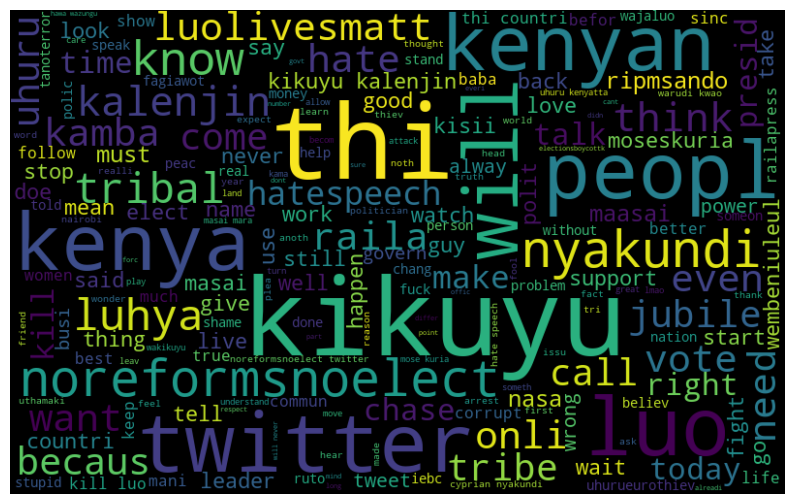

In [15]:
words = ' '.join([text for text in combi['tidy_tweet']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

### Words in non offensive_language

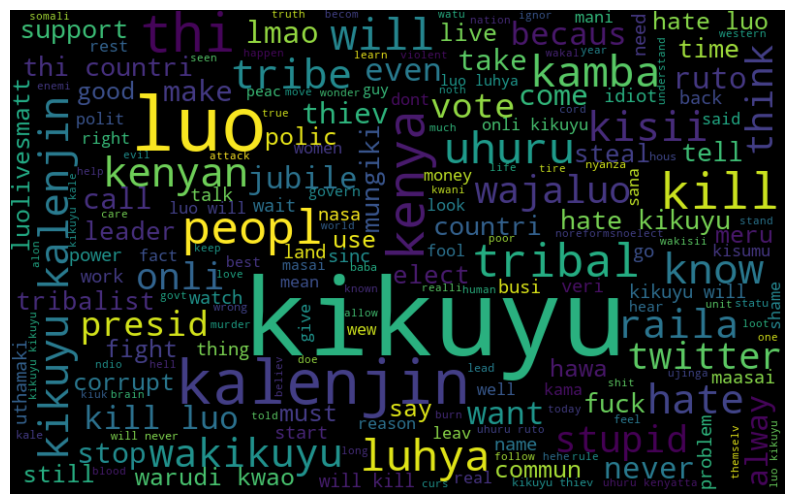

In [16]:
normal =' '.join([text for text in combi['tidy_tweet'][combi['class'] == 0]])  
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

### Impact of Hashtags on tweets sentiment

In [17]:
# function to collect hashtags
def hashtag_extract(x):    
    hashtags = []  
    # Loop over the words in the tweet  
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)     
    return hashtags

In [18]:
# extract hashtags from non offensive tweets 
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['class'] == 0]) 
# extract hashtags from offensive tweets 
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['class'] == 1]) 
# unnesting list 
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

### Non-Offensive tweets

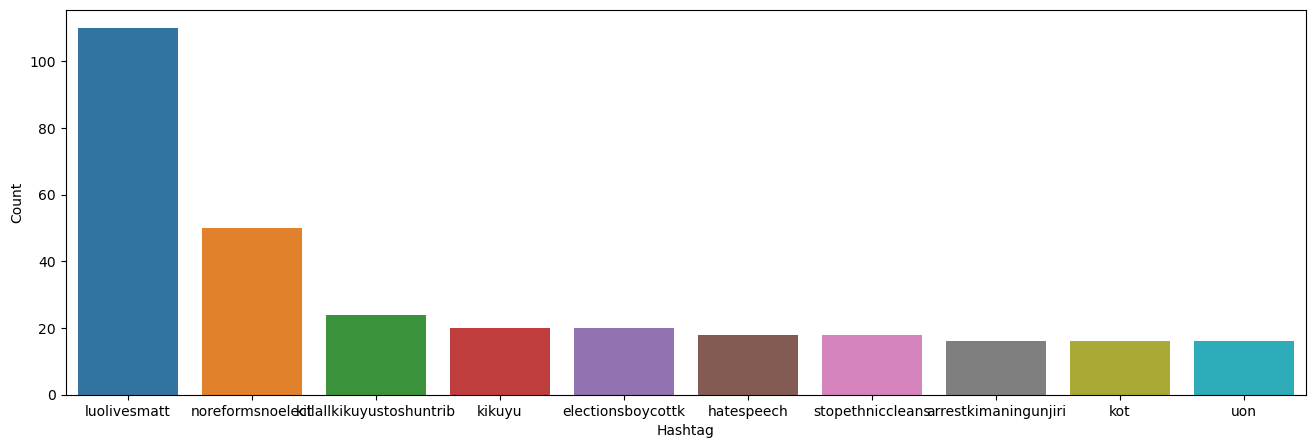

In [19]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())}) 
# select top 10 most frequent hashtags  
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count') 
plt.show()

### Offensive Tweets

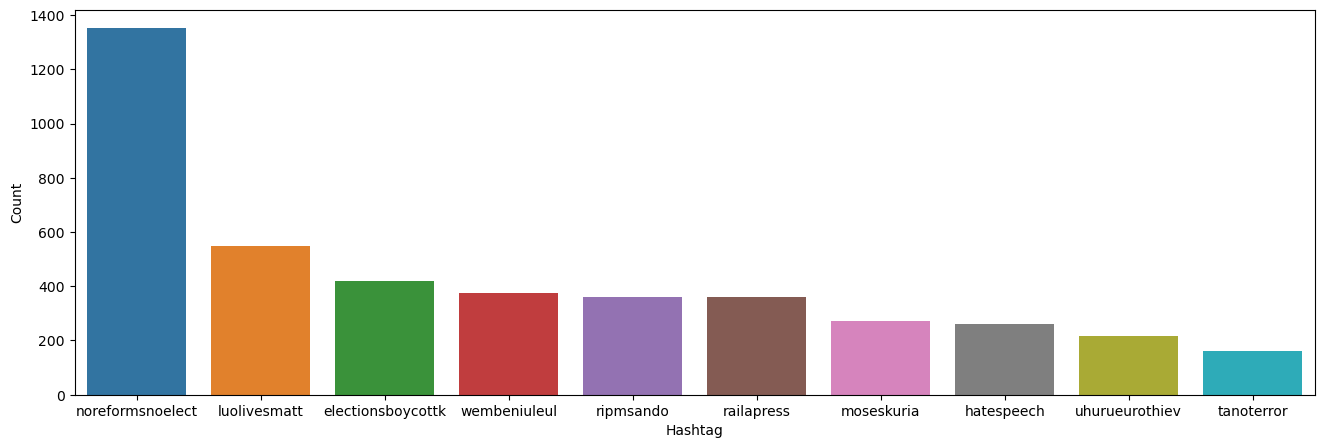

In [20]:
b = nltk.FreqDist(HT_negative) 
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())}) 
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

### Bag-of-Words Features

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import gensim

In [22]:
vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(100350, 1000)

### TF-IDF Features

In [23]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(100350, 1000)

### Word2Vec Features

### Word2Vec model on our corpus.

In [24]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
# tokenize
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            #size=50, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 
model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=25)

(24571716, 27332850)

In [25]:
model_w2v.wv.most_similar(positive="vote")

[('voter', 0.7046651840209961),
 ('recapp', 0.7026682496070862),
 ('mnawatenga', 0.6786763072013855),
 ('#groovewithsafaricom', 0.675098717212677),
 ('adawnag', 0.6722956895828247),
 ('teamwinn', 0.6707170605659485),
 ('wanaamua', 0.65972501039505),
 ('#tukomesheukabila', 0.652955949306488),
 ('asitupim', 0.6528672575950623),
 ('balambala', 0.652376651763916)]

In [26]:
model_w2v.wv.most_similar(positive='kikuyu')

[('luo', 0.840286135673523),
 ('they', 0.7880134582519531),
 ('kalenjin', 0.7515819072723389),
 ('that', 0.7515752911567688),
 ('confas', 0.6998895406723022),
 ('whrebi', 0.6982550621032715),
 ('tumbocr', 0.6978886127471924),
 ('peopl', 0.6950661540031433),
 ('kenyan', 0.69151771068573),
 ('have', 0.6812112331390381)]

### Vectors for Tweets

In [70]:
def word_vector(tokens,size):
    vec = np.zeros(size).reshape((1,size))
    count = 0
    for word in tokens:
        try:
            vec+=model_w2v[word].reshape((1,size))
            count+=1.
        except KeyError:
            #handling the case where the token is not in vocabulary
            continue
    if count!=0:
        vec/=count
        return vec

#### Doc2Vec Embedding

### Load the required libraries.

### Modeling

In [75]:
# importing Data 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(
    train.drop('count', 1), train['count'], test_size = 0.2, random_state=10) #split the data random_state=42, test_size=0.3)

C:\Users\DR SAGWE\AppData\Local\Temp\ipykernel_12924\682165915.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train.drop('count', 1), train['count'], test_size = 0.2, random_state=10) #split the data random_state=42, test_size=0.3)


In [76]:
#from sklearn.tree import DecisionTreeClassifier
#train_bow = DecisionTreeClassifier(random_state=1)
#train_bow.fit(xtrain_bow,ytrain)

#xtrain_bow = []
#train_bow_score = train_bow.score(xvalid_bow,yvalid)
#score_list["DTC"] = train_bow_score
#print(f"f1_Score is {train_bow_score}")

In [80]:
!pip install scikit-learn

### XGBOOST

In [48]:
from xgboost import XGBClassifier

In [55]:
#xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, xvalid_bow) 
#prediction = xgb_model.predict(xvalid_bow) 
#f1_score(yvalid, prediction)